<span>
<img src="https://cdlib.readthedocs.io/en/latest/_static/cdlogo.png" width="260px" align="right"/>
</span>
<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  3.7<br/>
<b>NDlib version:</b>  0.1.2<br/>
<b>Last update:</b> 5/03/2019
</span>

In [94]:
import warnings
warnings.filterwarnings('ignore')

<a id='top'></a>
# *Intro to CDlib: Community Discovery library*

``CDlib`` is a python library designed to provide support the extraction and analysis of network clusterings.

In this notebook are introduced some of the main features of the library and an overview of its functionalities.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

<a id='install'></a>
## 1. Installing CDlib ([to top](#top))

As a first step, we need to make sure that ``CDlib`` is installed and working.

The library is available for python 3.7, and its stable version can be installed using ``pip``:

    pip install cdlib

On the project [GitHub](https://github.com/GiulioRossetti/cdlib) are also available the nightly builds that can be installed as follows:

    pip install git+https://github.com/GiulioRossetti/ndlib.git > /dev/null

In order to check if ``cdlib`` has been correctly installed just try to import it

In [8]:
import cdlib

<a id='workflow'></a>
## 2. Community Discovery Workflow ([to top](#top))

``CDlib`` allows to extract, analyze and compare network clustering applying several approaches.
The standard workflow can be summarized as:
- Network Creation
- Community Discovery algorithm(s) selection and configuration
- Clustering(s) evaluation (Fitness functions)
- Clustering(s) evaluation (Comparisons)
- Community/Statistics Visualization

In this section we will observe how to templating such workflow applying two classic network clustering algorithms: Label Propagation and Leiden.

<a id="graph"></a>
### 2.A Graph object creation ([to top](#top))

As a first step we need to define the network topology that will be used as playground to study diffusive phenomena.

``CDlib`` natively supports both [``networkx``](https://networkx.github.io) and [``igraph``](https://igraph.org/python/) data structures.

In our examples, for the sake of simplicity, we will use ``networkx`` undirected graphs. 

In [71]:
import networkx as nx

g = nx.karate_club_graph()

<a id="model"></a>
### 2.B Community Discovery algorithm(s) selection and configuration ([to top](#top))

After having defined the graph, we can select the algorithm(s) to partition it.

In [72]:
from cdlib import algorithms

In [73]:
lp_coms = algorithms.label_propagation(g)

In [74]:
leiden_coms = algorithms.leiden(g)

All Community Discovery algorithms generate as result an object that implements a concrete instance of the ``Clustering`` datatype.

In particular, both Louvain and Label Propagation returns a ``NodeClustering`` object having the following propterties:

In [75]:
leiden_coms.method_name # Clustering algorithm name

'Leiden'

In [76]:
leiden_coms.method_parameters # Clustering parameters

{'initial_membership': None, 'weights': None}

In [77]:
leiden_coms.communities # Identified Clustering

[[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33],
 [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21],
 [23, 24, 25, 27, 28, 31],
 [4, 5, 6, 10, 16]]

In [78]:
leiden_coms.overlap # Wehter the clustering is overlapping or not

False

In [79]:
leiden_coms.node_coverage # Percentage of nodes covered by the clustering

1.0

Moreover, ``Clustering`` object allow also for the generation of a JSON representation of the results

In [80]:
leiden_coms.to_json()

'{"communities": [[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [23, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16]], "algorithm": "Leiden", "params": {"initial_membership": null, "weights": null}, "overlap": false, "coverage": 1.0}'

<a id="fitness"></a>
### 2.C Clustering Evaluation (Fitness functions) ([to top](#top))

After having obtained a network clustering we can compute several indexes upon it. 

For a same index it is possible to obtain a synthetic representation of its min/max/mean/std values

In [81]:
leiden_coms.average_internal_degree()

<class 'networkx.classes.graph.Graph'>


FitnessResult(min=2.3333333333333335, max=4.181818181818182, mean=3.103787878787879, std=0.7758948002447444)

as well as its communitiy-wise value

In [82]:
leiden_coms.average_internal_degree(summary=False)

<class 'networkx.classes.graph.Graph'>


[3.5, 4.181818181818182, 2.3333333333333335, 2.4]

Fitness scores can also be instantiated at library level

In [83]:
from cdlib import evaluation

evaluation.average_internal_degree(g, leiden_coms)

FitnessResult(min=2.3333333333333335, max=4.181818181818182, mean=3.103787878787879, std=0.7758948002447444)

For the complete list of implemented fitness functions, refer to the online [documentation](https://cdlib.readthedocs.io/en/latest/reference/evaluation.html).

<a id="comparison"></a>
### 2.D Clustering Evaluation (Comparison) ([to top](#top))

When multiple clustering have been computed on a same network it is useful to measure their resemblance.

``CDlib`` allows to do so by exposing several clustering resemblance scores, each one of them tailored to support specific kind of network clusterings (crisp/partition, complete/partial node coverage).

As for the fitness functions, resemblance scores can be instantiated at the community level as well as at the library level.

In [84]:
leiden_coms.normalized_mutual_information(lp_coms)

0.5505192629886139

In [85]:
evaluation.normalized_mutual_information(leiden_coms, lp_coms)

0.5505192629886139

<a id="visualization"></a>
### 2.E Community/Statistics Visualization ([to top](#top))

``CDlib`` allows to generate two families of predefined plots:
- network/community visualizations
- community fitness/comparison visualizations

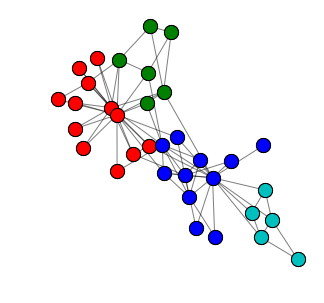

In [86]:
from cdlib import viz

pos = nx.spring_layout(g)
viz.plot_network_clusters(g, leiden_coms, pos, figsize=(5, 5))

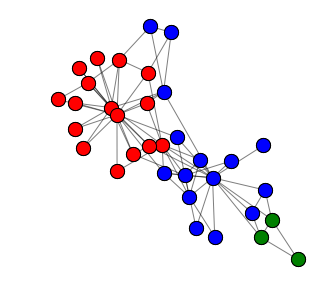

In [93]:
viz.plot_network_clusters(g, lp_coms, pos, figsize=(5, 5))

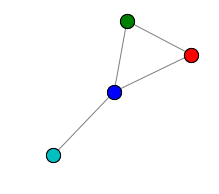

In [88]:
viz.plot_community_graph(g, leiden_coms, figsize=(3, 3))

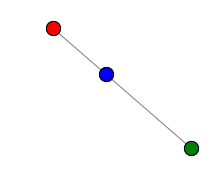

In [89]:
viz.plot_community_graph(g, lp_coms, figsize=(3, 3))

<class 'networkx.classes.graph.Graph'>


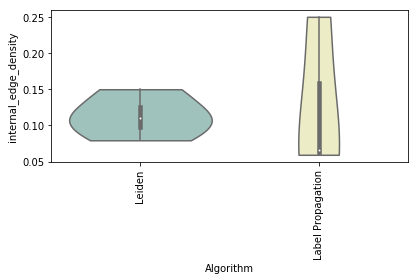

In [90]:
viz.plot_com_stat([leiden_coms, lp_coms], evaluation.internal_edge_density)

<class 'networkx.classes.graph.Graph'>
<class 'networkx.classes.graph.Graph'>


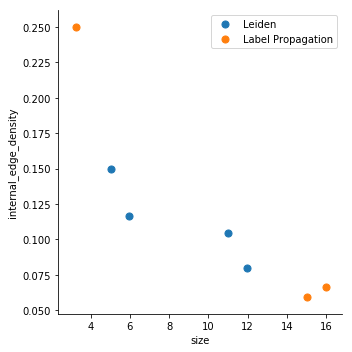

In [91]:
viz.plot_com_properties_relation([leiden_coms, lp_coms], evaluation.size, evaluation.internal_edge_density)